In [1]:
#using EO
@show typeof(identity)

typeof(identity) = typeof(identity)


typeof(identity) (singleton type of function identity, subtype of Function)

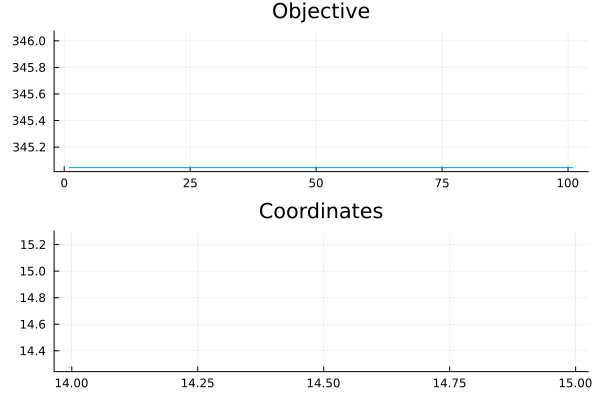

In [23]:
using EO

pop_size = 1000
dimension = 2

objective_function  = enclose_arguments(EO.f_sphere, ones(dimension))
initialization      = enclose_noargs(interval_real_initialization, dimension, pop_size, objective_function, 10, 100)
selection           = enclose_arguments(s_tournament, 10, 100)
crossover           = enclose_arguments(cr_single_point, pop_size)
mutation            = enclose_arguments(gaussian_preturbation!, 0.25)
replacement         = r_replacement
#replacement         = EO.enclose_replacement(r_keep_best_n, pop_size)
termination         = enclose_argument(iteration_termination, 100000)

constraints         = [EO.constraint(x -> x[1]-10, >=, 0.), EO.constraint(x -> x[1]+100, >=, 0.),
                        EO.constraint(x -> x[2]-10, >=, 0.), EO.constraint(x -> x[2]+100, >=, 0.)]

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination; constraints)
@show solution

EO.plot_results(solution)

# Problem G06
 f(x) = (x1 − 10)^3 + (x2 − 20)^3 

 13 ≤ x1 ≤ 100 and 0 ≤ x2 ≤ 100

fitness = [425860.2530796076, 51716.55188856993, 306651.0471978293, 176307.73732665807, 691335.4055765958, 58287.31966481611, 150939.74019022658, 24573.322718972635, 334623.7100376648, 774407.6184219944, -38.20793064794816, 171473.9654784499, 420374.75040675147, 57865.76501264693, 344308.1223262288, 179003.6082228681, 508375.5677971547, 270983.16288826626, 591404.3740155202, 240176.36764631813, 451361.03592122486, 127283.13402292256, 50451.37744195531, 307053.6371006252, 261442.8053199772, 131276.40370005107, 657143.9113484359, 3004.021522897396, 259888.32880985696, 496386.19359339285, 456931.3166426247, 232313.8902044828, 247029.68279035395, 536925.9199298765, 713482.7648377554, 139777.03699638747, 389515.2319643353, 515291.12910262385, 235663.60643942186, 287122.4174274239, 384794.4017681611, 191464.63006884174, 676175.636428819, 689522.360425088, 88859.43077114754, 199624.67020713023, 136302.95763242836, 55587.71503207174, 378946.12000931957, 1408.502285183283, 192860.1373577369, -7

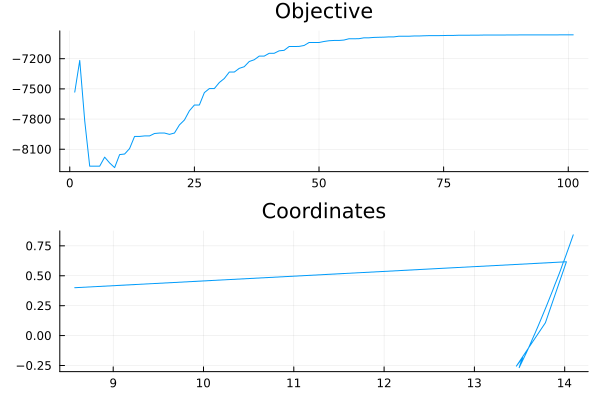

In [11]:
using EO

pop_size = 1000
dimension = 2

f_obj(x) = (x.sequence[1]-10)^3 + (x.sequence[2]-20)^3

objective_function  = f_obj
initialization      = enclose_noargs(interval_real_initialization, dimension, pop_size, objective_function, 0, 100)
selection           = enclose_arguments(s_tournament, 10, 100)
crossover           = enclose_arguments(cr_single_point, pop_size)
mutation            = enclose_arguments(gaussian_preturbation!, 0.25)
replacement         = EO.enclose_replacement(r_keep_best_n, pop_size)
#replacement         = r_replacement
termination         = enclose_argument(iteration_termination, 100000)

constraints         = [EO.constraint(x -> -(x[1]-5)^2 - (x[2]-5)^2 + 100, .<=, 0.), EO.constraint(x -> (x[1]-6)^2 + (x[2]-5)^2 − 82.81, .<=, 0.),
                       EO.constraint(x -> -x[1]+13, <=, 0.), EO.constraint(x -> x[1]-100, <=, 0.), 
                       EO.constraint(x -> -x[2], <=, 0.), EO.constraint(x -> x[2]-100, <=, 0.)]


solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination; constraints)
@show solution

EO.plot_results(solution)

fitness = [83805.53066942887, 75958.45696313748, 21824.743869315538, 152593.6557126181, 700694.7075610864, 73706.2928874991, 54679.27661987703, 47501.65774932782, 107331.57920819725, 244069.53598819097, 4319.426066380465, 62973.02571832156, 121169.03422250561, 650753.879225604, 342319.28837380226, 14214.300523372664, 774827.5432460249, 30925.375141134624, 656555.5220221067, 434519.6887845683, 560241.7829386209, 321193.01587373257, 325869.69945534953, 290853.4390459591, 60514.820125774975, 20254.151973915552, 400191.5254410053, 708783.4230120124, 215953.9169048383, 38802.03884669986, 351234.4239771716, 323913.468899703, 228658.05343674627, 142644.64036091368, 23778.88724774116, 3942.6957369947113, 250598.74464466813, 768466.6051179378, 60379.604465826356, 9392.209819849673, 1.324193910822741, 70113.94518726252, -484.5596270317066, 734796.7407074624, 433654.82875101944, -4099.342503835739, 491498.49128136376, 16023.65306449983, 293847.25296848966, 199660.53968364632, 170248.78301990716, 

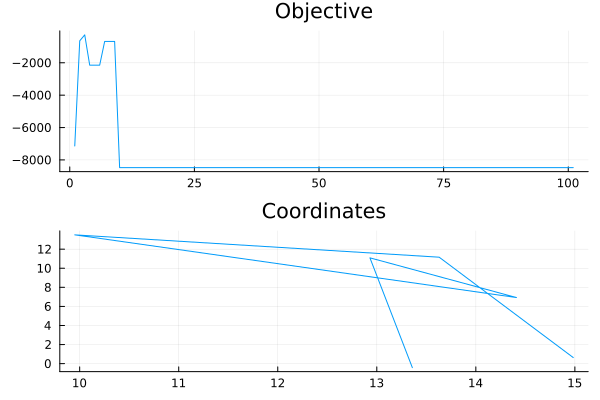

In [6]:
using EO

pop_size = 1000
dimension = 2

f_obj(x) = (x.sequence[1]-10)^3 + (x.sequence[2]-20)^3

objective_function  = f_obj
initialization      = enclose_noargs(interval_real_initialization, dimension, pop_size, objective_function, 0, 100)
selection           = enclose_arguments(EO.s_identity, pop_size*2)
crossover           = cr_single_point
mutation            = enclose_arguments(gaussian_preturbation!, 0.25)
replacement         = EO.enclose_replacement(r_keep_best_n, pop_size)
replacement         = r_replacement
termination         = enclose_argument(iteration_termination, 100000)

constraints         = [EO.constraint(x -> -(x[1]-5)^2 - (x[2]-5)^2 + 100, .<=, 0.), EO.constraint(x -> (x[1]-6)^2 + (x[2]-5)^2 − 82.81, .<=, 0.),
                       EO.constraint(x -> -x[1]+13, <=, 0.), EO.constraint(x -> x[1]-100, <=, 0.), 
                       EO.constraint(x -> -x[2], <=, 0.), EO.constraint(x -> x[2]-100, <=, 0.)]


solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination; constraints)
@show solution

EO.plot_results(solution)

fitness = [1.4413663969547302e-8, -2.2998504455644526e-9, 8.573213364325098e-11, -6.806141508799404e-9, 1.0349575496171886e-7, -5.081851209914755e-6, -4.158765189281997e-9, -2.6814661556058327e-7, -2.4090486023161914e-7, 2.054818213055765e-9, 6.372403927557527e-8, -4.363068871972888e-7, -1.301881899591201e-8, -3.894294883439419e-9, -8.497736497558955e-9, -5.228958540886087e-6, 2.4635523246896853e-8, 1.2189866890334692e-8, 8.41262618719028e-9, -3.930408567642398e-7, -0.00011020549798479459, -5.0182381588575635e-6, -3.1920213953053504e-7, 1.1683465215493422e-9, -3.359224820852403e-9, 1.7475091867273963e-8, -2.637603514569057e-10, 1.1698410047263703e-7, 3.330678081221775e-9, 7.081566832123741e-9, -3.016603724986027e-9, 1.0350978455036066e-8, 8.530231752342982e-10, 6.282168642215814e-8, -1.2614071573934726e-7, 2.2767056895143324e-10, -7.02945371370503e-7, 1.4408184170833345e-6, 9.075712479278793e-10, -3.8586184353133964e-7, 2.9323972973936047e-9, -1.4994322465446688e-8, -3.868609002169443e

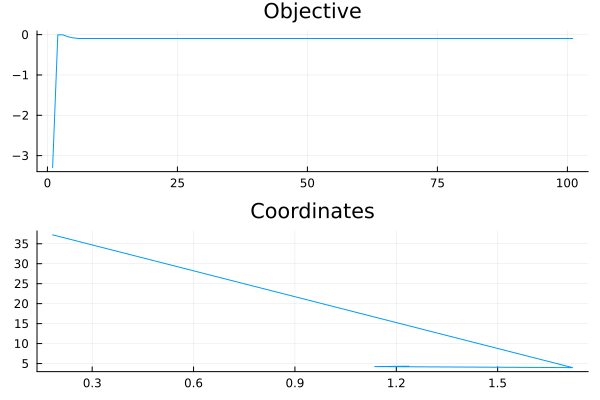

In [1]:
using EO

pop_size = 1000
dimension = 2

f_obj(x) = -(sin(2*pi*x.sequence[1])^3 * sin(2*pi*x.sequence[2]))/(x.sequence[1]^3*(x.sequence[1] + x.sequence[2]))

objective_function  = f_obj
initialization      = enclose_noargs(interval_real_initialization, dimension, pop_size, objective_function, 0, 100)
#selection           = enclose_arguments(EO.s_identity, pop_size*2)
selection           = enclose_arguments(s_tournament, 10, 100)
crossover           = cr_single_point
crossover           = enclose_arguments(cr_single_point, pop_size)
mutation            = enclose_arguments(gaussian_preturbation!, 0.25)
replacement         = EO.enclose_replacement(r_keep_best_n, pop_size)
#replacement         = r_replacement
termination         = enclose_argument(iteration_termination, 100000)

constraints         = [EO.constraint(x -> x[1]^2 - x[2] + 1, <=, 0.), EO.constraint(x -> 1 - x[1] + (x[2]-4)^2, <=, 0.),
                       EO.constraint(x -> -x[1], <=, 0.), EO.constraint(x -> x[1] - 10, <=, 0.), 
                       EO.constraint(x -> -x[2], <=, 0.), EO.constraint(x -> x[2] - 10, <=, 0.)]


solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination; constraints)
@show solution

EO.plot_results(solution)

fitness = [0.041003453806344424, 2.3791943385866214, 1.668595179908479, 1.0278679857999018, 2.029763494330865, 3.2694218017582823, 1.9094115937106966, 0.08927194900033324, 4.119333004032776, 3.273551443834264, 1.400327112042127, 1.227910256729076, 4.166595910853559, 1.1384660465684167, 2.9315241233688796, 1.799535776471135, 2.32022347676074, 2.2132471247927143, 1.0765811455914767, 1.9869258500149518, 0.09795516359411396, 1.705738073654515, 0.0037818210826143133, 4.1357925508410425, 0.09053184829718827, 4.142177480247423, 0.16716535088565473, 2.9468390431336955, 0.9342937182422879, 1.0260260052566728, 2.5483863604147943, 1.6461063488595036, 2.3841789009831142, 2.390970627887142, 0.5936735580113073, 1.1184107159683245, 1.8305767405579356, 0.4764505161635342, 1.2457623999662346, 3.0059827081611905, 1.0298142886160009, 2.6024299640617277, 0.5257926272684519, 0.2746760674045873, 2.7831684178096547, 3.3168437934818855, 0.23642237680836983, 2.502153352696359, 0.4195699006534476, 0.83907633221

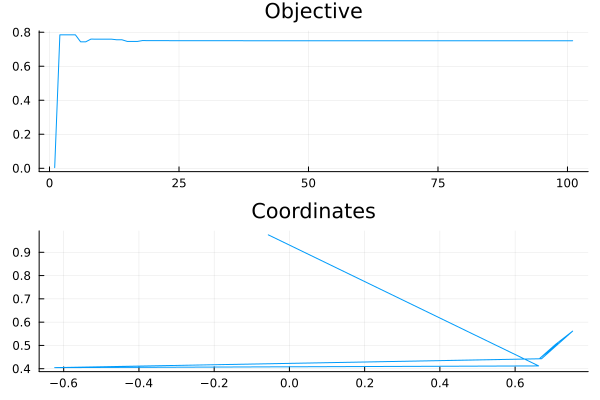

In [22]:
using EO

pop_size = 100
dimension = 2

f_obj(x) = x.sequence[1]^2 + (x.sequence[2]-1)^2

objective_function  = f_obj
initialization      = enclose_noargs(interval_real_initialization, dimension, pop_size, objective_function, -1, 1)
selection           = enclose_arguments(s_tournament, 5, 10)
crossover           = enclose_arguments(cr_single_point, pop_size)
mutation            = enclose_arguments(gaussian_preturbation!, 0.25)
replacement         = EO.enclose_replacement(r_keep_best_n, pop_size)
termination         = enclose_argument(iteration_termination, pop_size*100)

constraints         = [EO.constraint(x -> x[2] - x[1]^2 - 1e-7, <=, 0.), EO.constraint(x -> -x[2] + x[1]^2 + 1e-7, <=, 0.),
                       EO.constraint(x -> -x[1]-1, <=, 0.), EO.constraint(x -> x[1]-1, <=, 0.), 
                       EO.constraint(x -> -x[2]-1, <=, 0.), EO.constraint(x -> x[2]-1, <=, 0.)]


solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination; constraints)
@show solution

EO.plot_results(solution)

fitness = [-4.006493554732854, -4.084260908558139, -3.498747969352286, -4.933898758075781, -3.1699301757615563, -3.053936688171253, -2.9750271922041676, -3.671469609721292, -5.880198330723267, -3.1587814191646926, -3.9693471659118735, -3.0638052867983068, -4.052148332846808, -5.856802143686201, -2.3735504054022716, -4.939013132900387, -4.061248737813768, -4.635821227467253, -5.118518528740461, -6.541046590260125, -6.234940897267604, -1.743065884760456, -4.934556649957631, -0.9228314184252584, -5.774409671352133, -4.051514630686976, -2.2142336156823412, -5.474250891195892, -1.319570990402834, -7.223750961120643, -4.9514017053077275, -2.1254452369198034, -1.0552013132815579, -3.5725999764267966, -5.212147077582475, -5.180789988287406, -4.895586990604318, -3.3632811933894384, -3.9965288646008936, -2.7507820936686156, -5.03824696464553, -1.605396852708667, -6.715551123451488, -4.4900016982707935, -3.8378674582082235, -7.876452171724781, -2.933576324942418, -4.933169441347266, -3.7554428908

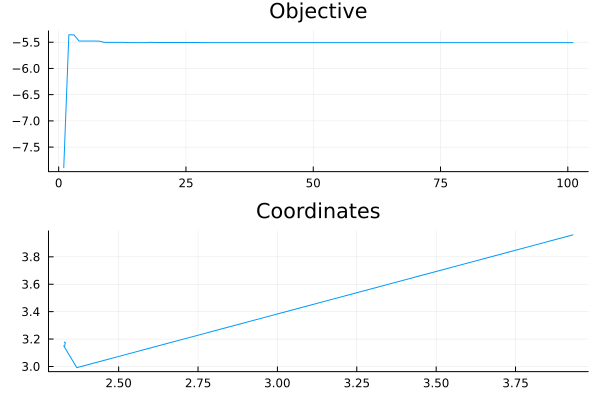

In [1]:
using EO

pop_size = 1000
dimension = 2

f_obj(x) = - x.sequence[1] - x.sequence[2]

objective_function  = f_obj
initialization      = enclose_noargs(interval_real_initialization, dimension, pop_size, objective_function, 0, 4)
selection           = enclose_arguments(s_tournament, 10, 100)
#crossover           = enclose_arguments(cr_single_point, pop_size)
crossover           = enclose_arguments(EO.cr_parent_sum, pop_size)
mutation            = enclose_arguments(gaussian_preturbation!, 0.25)
replacement         = EO.enclose_replacement(r_keep_best_n, pop_size)
#replacement         = r_replacement
termination         = enclose_argument(iteration_termination, 100000)

constraints         = [EO.constraint(x -> -2*x[1]^4 + 8*x[1]^3 - 8*x[1]^2 + x[2] - 2, <=, 0.), EO.constraint(x -> -4*x[1]^4 + 32*x[1]^3 - 88*x[1]^2 + 96*x[1] + x[2] - 36, <=, 0.),
                       EO.constraint(x -> -x[1], <=, 0.), EO.constraint(x -> x[1]-3, <=, 0.), 
                       EO.constraint(x -> -x[2], <=, 0.), EO.constraint(x -> x[2]-4, <=, 0.)]


solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination; constraints)
@show solution

EO.plot_results(solution)

In [7]:
using EO

pop_size = 100
dimension = 2

f_obj(x) = (x.sequence[1]-10)^3 + (x.sequence[2]-20)^3

constraints         = [EO.constraint(x -> -(x[1]-5)^2 - (x[2]-5)^2 + 100, .<=, 0.), EO.constraint(x -> (x[1]-6)^2 + (x[2]-5)^2 − 82.81, .<=, 0.),
                       EO.constraint(x -> -x[1]+13, <=, 0.), EO.constraint(x -> x[1]-100, <=, 0.), 
                       EO.constraint(x -> -x[2], <=, 0.), EO.constraint(x -> x[2]-100, <=, 0.)]

objective_function  = enclose_arguments(f_linear, ones(dimension+1))
initialization      = enclose_noargs(interval_real_initialization, dimension, pop_size, objective_function, 0, 1000)
selection           = enclose_arguments(EO.s_stochastic_tournament, 10, 30, constraints, 0.4)
crossover           = enclose_arguments(EO.cr_parent_sum, pop_size)
mutation            = enclose_arguments(gaussian_preturbation!, 0.25)
replacement         = EO.enclose_replacement(EO.r_keep_best_n_stoch, pop_size, constraints, 0.4)
#replacement         = EO.enclose_replacement(EO.r_keep_best_n, pop_size)
#replacement         = r_replacement
termination         = enclose_argument(iteration_termination, pop_size*1000)

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination; constraints)

#EO.plot_results(solution)

#for s in solution
    enum = enumerate(solution[10].population)
    x = map(x->x[2].sequence[1], enum)
    y = map(x->x[2].sequence[2], enum)
    using Plots
    scatter(x, y)
#end

@show solution[end]

constraints(top_x) = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(top_x, top_f) = (RealChromosome(Real[14.137100710709914, 0.9363324715563041], 2), 16.073433182266218)
solution[end] = EO.SingleObjPopulation{RealChromosome}(RealChromosome[RealChromosome(Real[14.137100710709914, 0.9363324715563041], 2), RealChromosome(Real[14.137100706232449, 0.9363324796134392], 2), RealChromosome(Real[14.1371006909439, 0.9363325247129379], 2), RealChromosome(Real[14.137100693504353, 0.9363325236925729], 2), RealChromosome(Real[14.137100652164186, 0.9363325694803428], 2), RealChromosome(Real[14.137100703706565, 0.936332525281519], 2), RealChromosome(Real[14.137100706405288, 0.9363325243793432], 2), RealChromosome(Real[14.137100729901373, 0.9363325009390507], 2), RealChromosome(Real[14.137100714364255, 0.9363325210339493], 2), RealChromosome(Real[14.137100731083509, 0.9363325047158373], 2), RealChromosome(Real[14.137100736304006, 0.9363325015119968], 2), RealChromosome(Real[14.137100709896536, 0.9363325279948842], 2)

EO.SingleObjPopulation{RealChromosome}(RealChromosome[RealChromosome(Real[14.137100710709914, 0.9363324715563041], 2), RealChromosome(Real[14.137100706232449, 0.9363324796134392], 2), RealChromosome(Real[14.1371006909439, 0.9363325247129379], 2), RealChromosome(Real[14.137100693504353, 0.9363325236925729], 2), RealChromosome(Real[14.137100652164186, 0.9363325694803428], 2), RealChromosome(Real[14.137100703706565, 0.936332525281519], 2), RealChromosome(Real[14.137100706405288, 0.9363325243793432], 2), RealChromosome(Real[14.137100729901373, 0.9363325009390507], 2), RealChromosome(Real[14.137100714364255, 0.9363325210339493], 2), RealChromosome(Real[14.137100731083509, 0.9363325047158373], 2)  …  RealChromosome(Real[14.137100696846549, 0.9363325809310578], 2), RealChromosome(Real[14.13710072157135, 0.9363325562904586], 2), RealChromosome(Real[14.137100736820413, 0.9363325411311314], 2), RealChromosome(Real[14.137100736820415, 0.9363325411311314], 2), RealChromosome(Real[14.13710073682041

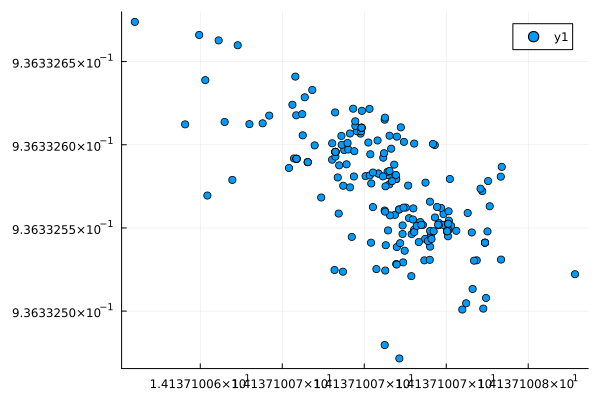

In [8]:
enum = enumerate(solution[1000].population)
x = map(x->x[2].sequence[1], enum)
y = map(x->x[2].sequence[2], enum)
using Plots
scatter(x, y)

fitness = [201.82957118847787]
constraints(top_x) = [0, 0, 0, 0, 0, 0]
solution.top_value = -8.667483123300493e101


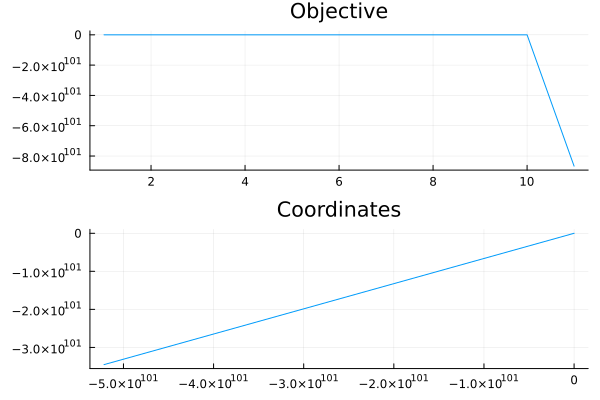

In [7]:
using EO

pop_size = 1
dimension = 2

objective_function  = enclose_arguments(f_linear, ones(dimension+1))
initialization      = enclose_noargs(interval_real_initialization, dimension, pop_size, objective_function, 100, 101)
selection           = EO.s_identity
crossover           = identity
mutation            = enclose_arguments(gaussian_preturbation!, 10.)
replacement         = EO.enclose_replacement(r_keep_best_n, 1)
termination         = enclose_argument(iteration_termination, 1000)

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination; constraints)
@show solution.top_value

EO.plot_results(solution)